In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

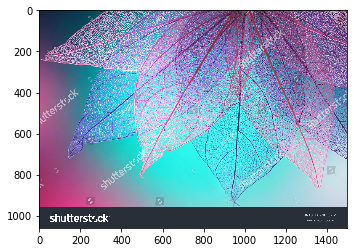

In [4]:
img = cv2.imread('a.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
original_img = img
plt.show()

In [5]:
print(img.shape)

(1060, 1500, 3)


In [6]:
# Flatten each channel of the image in linear array
all_pixels = img.reshape((1500*1060, 3))

In [7]:
print(all_pixels.shape)

(1590000, 3)


In [8]:
from sklearn.cluster import KMeans

In [9]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
centers = km.cluster_centers_

In [11]:
centers = np.array(centers, dtype='uint8')

In [12]:
print(centers)

[[186 192 224]
 [135 100 153]
 [ 44  55  77]
 [ 78 209 220]]


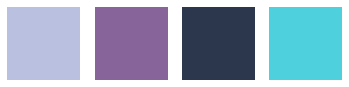

In [13]:
i = 1

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    
    # color swatch 
    a = np.zeros((100,100,3), dtype='uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    
plt.show()

In [14]:
new_img = np.zeros((1060*1500,3), dtype='uint8')
print(new_img.shape)

(1590000, 3)


In [15]:
a = km.labels_
print(len(a))
colors

1590000


[array([186, 192, 224], dtype=uint8),
 array([135, 100, 153], dtype=uint8),
 array([44, 55, 77], dtype=uint8),
 array([ 78, 209, 220], dtype=uint8)]

In [16]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_img.shape))

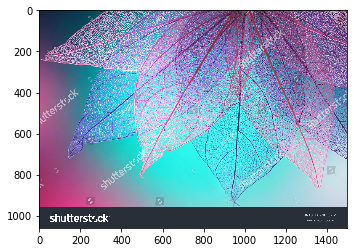

In [17]:
plt.imshow(new_img)
plt.imshow(original_img)
plt.show()

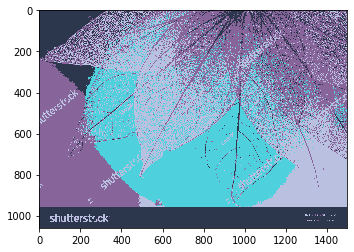

In [18]:
plt.imshow(new_img)
plt.show()